En esta parte se encuentra codigo de los mínimos cuadrados y con incertidumbre

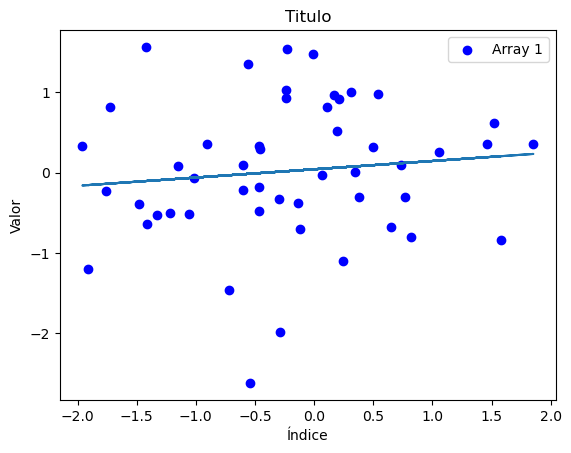

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # Esto asegura que obtengas los mismos resultados cada vez que ejecutas el código
array1 = np.random.randn(50)  # 50 números aleatorios entre 0 y 1
array2 = np.random.randn(50)  # 50 números aleatorios con distribución normal estándar



def minimos_cuadrados(x,y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x*y)
    sum_x_2 = np.sum(x**2)
    pendiente = (n*sum_xy-(sum_x*sum_y))/(n*sum_x_2-(abs(sum_x)**2))
    intercepto = (sum_y*sum_x_2-sum_x*np.sum(x*y))/(n*sum_x_2-(abs(sum_x)**2))
    return pendiente,intercepto 
m,b = minimos_cuadrados(array1,array2)


# Crear una gráfica de dispersión
plt.scatter(array1, array2, label='Array 1', color='blue')
plt.plot(array1,m*array1+b)

# Personalizar la gráfica
plt.title("Titulo")
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()

# Mostrar la gráfica
plt.show()